In [7]:
# IMPORTACIÓN DE LIBRERÍAS
import pandas as pd
import numpy as np
import os


# DEFINICIÓN DE RUTAS DE ARCHIVOS
csv_path = 'C:\\Users\\anto-\\OneDrive\\Desktop\\PracticasMaster\\bank-additional.csv'
excel_path = 'C:\\Users\\anto-\\OneDrive\\Desktop\\PracticasMaster\\customer-details.xlsx'
fixed_csv_path = 'C:\\Users\\anto-\\OneDrive\\Desktop\\PracticasMaster\\bank-additional-fixed.csv'  # Guardar en la misma carpeta local

# FUNCIÓN PARA LIMPIAR CSV CON ERRORES DE FORMATO

def clean_csv_file(input_path, output_path):
    """
    Limpiar el archivo CSV file quitando las comas y arreglando las comillas.
    Asegurarse de que el CSV se pueda leer correctamente (utf-8) después de la limpieza.
    Parametros:
    - input_path (str): Path del CSV original.
    - output_path (str): Path CSV arreglado.
    """
    with open(input_path, 'r', encoding='utf-8') as f:
        raw_lines = f.readlines()

    cleaned_lines = []
    for line in raw_lines:
        # Eliminar comas al inicio
        line = line.lstrip(',')
        # Reemplazar comillas dobles duplicadas (error común)
        line = line.replace('""', '"')
        cleaned_lines.append(line)

    with open(output_path, 'w', encoding='utf-8') as f:
        f.writelines(cleaned_lines)

# Ejecutar limpieza
clean_csv_file(csv_path, fixed_csv_path)

# CARGA DE DATOS LIMPIOS
df_bank = pd.read_csv(fixed_csv_path, sep=",", quotechar='"')
df_customer = pd.read_excel(excel_path)

# HOMOGENEIZACIÓN DE COLUMNAS NUMÉRICAS
cols_to_fix = ['cons.price.idx', 'cons.conf.idx', 'euribor3m']
for col in cols_to_fix:
    if col in df_bank.columns:
        df_bank[col] = df_bank[col].astype(str).str.replace(",", ".", regex=False).astype(float)

# REVISIÓN INICIAL DE LOS DATOS

print("Bank DataFrame:")
display(df_bank.head())

print("Customer Details DataFrame:")
display(df_customer.head())


Bank DataFrame:


,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,1.1,93.994,-36.4,4.857,5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,1.1,93.994,-36.4,NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,1.1,93.994,-36.4,4.857,5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,1.1,93.994,-36.4,NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,1.1,93.994,-36.4,NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


Customer Details DataFrame:


,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [ ]:
# Camio el nombre de la columna en df_bank
if 'id_' in df_bank.columns:
    df_bank.rename(columns={'id_': 'ID'}, inplace=True)

# Compruebo que ambas columnas (ID) son del mismo tipo
df_bank['ID'] = df_bank['ID'].astype(str)
df_customer['ID'] = df_customer['ID'].astype(str)

# Unimos ambos DataFrames con un merge inner    
df_merged = pd.merge(df_bank, df_customer, on='ID', how='inner')

# Mostramos el resultado
print("Merged DataFrame:")
display(df_merged.head())

# Tamaño final del DataFrame
print(f"Registros combinados: {df_merged.shape[0]} filas, {df_merged.shape[1]} columnas")


Merged DataFrame:


,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,date,latitude,longitude,ID,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,0,161770,1,0,2012-04-04,29
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,1,85477,1,1,2012-12-30,7
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,2,147233,1,1,2012-02-02,5
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,3,121393,1,2,2012-12-21,29
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,4,63164,1,2,2012-06-20,20


Registros combinados: 20018 filas, 29 columnas


Resumen general:
Filas: 20018
Columnas: 29
Duplicados: 0

Valores nulos por columna:
default              5860
euribor3m            4127
age                  2254
education             956
loan                  521
housing               521
job                   211
cons.price.idx        194
date                  109
marital                33
campaign                0
contact                 0
duration                0
poutcome                0
previous                0
pdays                   0
emp.var.rate            0
cons.conf.idx           0
nr.employed             0
y                       0
latitude                0
longitude               0
ID                      0
Unnamed: 0              0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
NumWebVisitsMonth       0
dtype: int64

Estadísticas descriptivas (numéricas):
                     count                           mean  \
age                17764.0                     

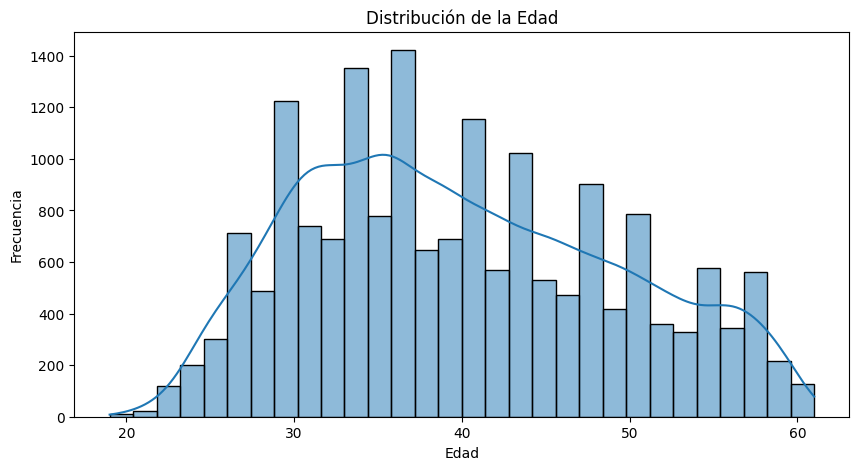

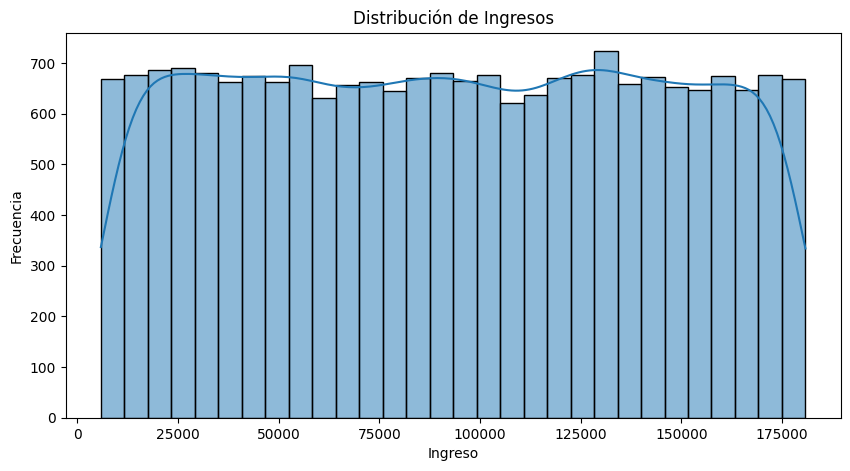

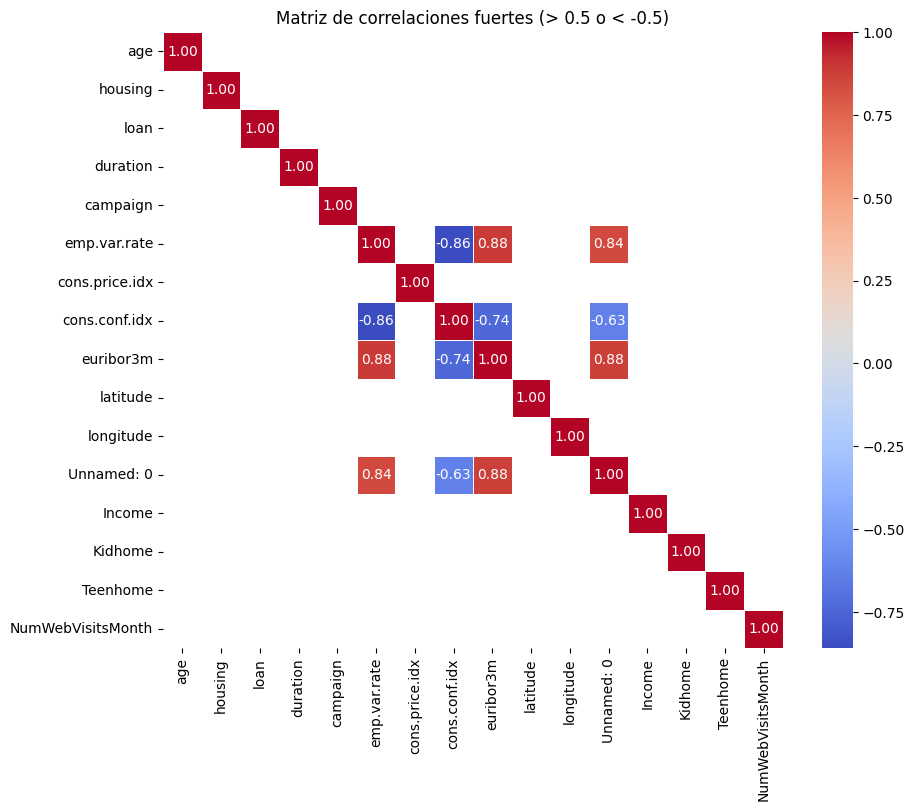

Relaciones fuertes encontradas:
cons.conf.idx vs emp.var.rate → correlación: -0.86
euribor3m vs emp.var.rate → correlación: 0.88
Unnamed: 0 vs emp.var.rate → correlación: 0.84
emp.var.rate vs cons.conf.idx → correlación: -0.86
euribor3m vs cons.conf.idx → correlación: -0.74
Unnamed: 0 vs cons.conf.idx → correlación: -0.63
emp.var.rate vs euribor3m → correlación: 0.88
cons.conf.idx vs euribor3m → correlación: -0.74
Unnamed: 0 vs euribor3m → correlación: 0.88
emp.var.rate vs Unnamed: 0 → correlación: 0.84
cons.conf.idx vs Unnamed: 0 → correlación: -0.63
euribor3m vs Unnamed: 0 → correlación: 0.88


In [10]:
# descargo las librerías de visualización para controlar la calidad de los datos
import matplotlib.pyplot as plt
import seaborn as sns

# Hago un resumen general del DataFrame combinado
print("Resumen general:")
print(f"Filas: {df_merged.shape[0]}")
print(f"Columnas: {df_merged.shape[1]}")
print(f"Duplicados: {df_merged.duplicated().sum()}")
print("\nValores nulos por columna:")
print(df_merged.isnull().sum().sort_values(ascending=False))

# descrioción de las columnas categóricas
print("\nEstadísticas descriptivas (numéricas):")
print(df_merged.describe().T)

# Miro la distribución de la edad, ingresos y la correlación de los datos

# EDAD
plt.figure(figsize=(10, 5))
sns.histplot(df_merged['age'], bins=30, kde=True)
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# INGRESOS
plt.figure(figsize=(10, 5))
sns.histplot(df_merged['Income'], bins=30, kde=True)
plt.title("Distribución de Ingresos")
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia")
plt.show()

# CORRELACIÓN ENTRE VARIABLES NUMÉRICAS
# +1 → correlación perfecta positiva (cuando una sube, la otra también).
# -1 → correlación perfecta negativa (cuando una sube, la otra baja).
# 0 → sin relación lineal.

numeric_df = df_merged.select_dtypes(include=["int64", "float64"])
# Calcular la matriz de correlación
corr_matrix = numeric_df.corr()

# Filtrar correlaciones fuertes (> 0.5 o < -0.5, excluyendo la diagonal)
strong_corrs = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]
strong_corrs = strong_corrs.dropna(how='all').dropna(axis=1, how='all')

# Mostrar en forma de mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(strong_corrs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlaciones fuertes (> 0.5 o < -0.5)")
plt.show()

# Imprimir relaciones clave
print("Relaciones fuertes encontradas:")
for col in strong_corrs.columns:
    for idx in strong_corrs.index:
        if col != idx and abs(strong_corrs.loc[idx, col]) > 0.5:
            print(f"{idx} vs {col} → correlación: {strong_corrs.loc[idx, col]:.2f}")



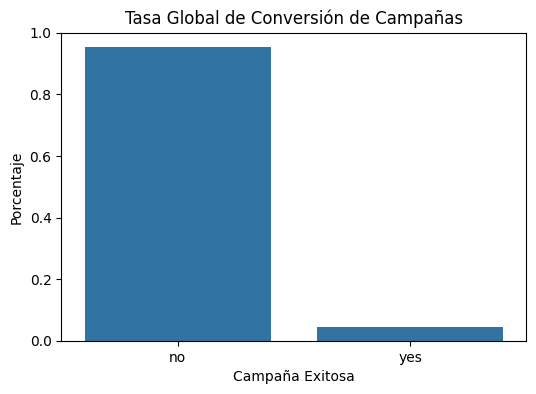

y,no,yes,total,tasa_conv
marital,,,,
SINGLE,4692,253,4945,0.05
MARRIED,12110,558,12668,0.04
DIVORCED,2268,104,2372,0.04


y,no,yes,total,tasa_conv
education,,,,
basic.6y,1280.0,71.0,1351.0,0.05
university.degree,4451.0,226.0,4677.0,0.05
basic.9y,3239.0,163.0,3402.0,0.05
high.school,4616.0,224.0,4840.0,0.05
professional.course,2297.0,106.0,2403.0,0.04
basic.4y,2291.0,91.0,2382.0,0.04
illiterate,7.0,0.0,7.0,0.00


y,no,yes,total,tasa_conv
housing,,,,
0.0,9427,472,9899,0.05
1.0,9164,434,9598,0.05


y                                                        no  yes
job          marital  education           housing loan          
admin.       DIVORCED basic.4y            1.0     1.0   0.0  1.0
student      DIVORCED professional.course 0.0     0.0   0.0  1.0
entrepreneur SINGLE   basic.6y            0.0     0.0   0.0  1.0
             MARRIED  high.school         1.0     1.0   0.0  1.0
services     SINGLE   basic.6y            0.0     1.0   0.0  1.0
management   SINGLE   basic.9y            0.0     1.0   0.0  1.0
technician   DIVORCED basic.6y            1.0     0.0   0.5  0.5
student      MARRIED  university.degree   1.0     0.0   0.5  0.5
services     DIVORCED university.degree   0.0     1.0   0.5  0.5
management   MARRIED  basic.4y            1.0     1.0   0.5  0.5

In [11]:
# Agrupación por campañas exitosas (y = 'yes') vs. fallidas (y = 'no')
conversion_by_outcome = df_merged['y'].value_counts(normalize=True).rename_axis('Campaña Exitosa').reset_index(name='Porcentaje')

# Comparativa por segmento: marital
marital_conv = df_merged.groupby(['marital', 'y']).size().unstack().fillna(0)
marital_conv['total'] = marital_conv.sum(axis=1)
marital_conv['tasa_conv'] = marital_conv['yes'] / marital_conv['total']

# Comparativa por segmento: education
education_conv = df_merged.groupby(['education', 'y']).size().unstack().fillna(0)
education_conv['total'] = education_conv.sum(axis=1)
education_conv['tasa_conv'] = education_conv['yes'] / education_conv['total']

# Comparativa por segmento: housing
housing_conv = df_merged.groupby(['housing', 'y']).size().unstack().fillna(0)
housing_conv['total'] = housing_conv.sum(axis=1)
housing_conv['tasa_conv'] = housing_conv['yes'] / housing_conv['total']

# Perfiles con alta conversión: top 10 combinaciones
top_profiles = df_merged.groupby(['job', 'marital', 'education', 'housing', 'loan'])['y'].value_counts(normalize=True).unstack().fillna(0)
top_profiles = top_profiles[top_profiles['yes'] > 0].sort_values(by='yes', ascending=False).head(10)

# Visualización: campañas exitosas vs fallidas
plt.figure(figsize=(6, 4))
sns.barplot(data=conversion_by_outcome, x='Campaña Exitosa', y='Porcentaje')
plt.title("Tasa Global de Conversión de Campañas")
plt.ylabel("Porcentaje")
plt.ylim(0, 1)
plt.show()

# Mostrar los DataFrames de insights
display(marital_conv.sort_values("tasa_conv", ascending=False).round(2))
display(education_conv.sort_values("tasa_conv", ascending=False).round(2))
display(housing_conv.sort_values("tasa_conv", ascending=False).round(2))
display(top_profiles.round(2))



Distribución del Target (y):
y
no     95.414127
yes     4.585873
Name: proportion, dtype: float64


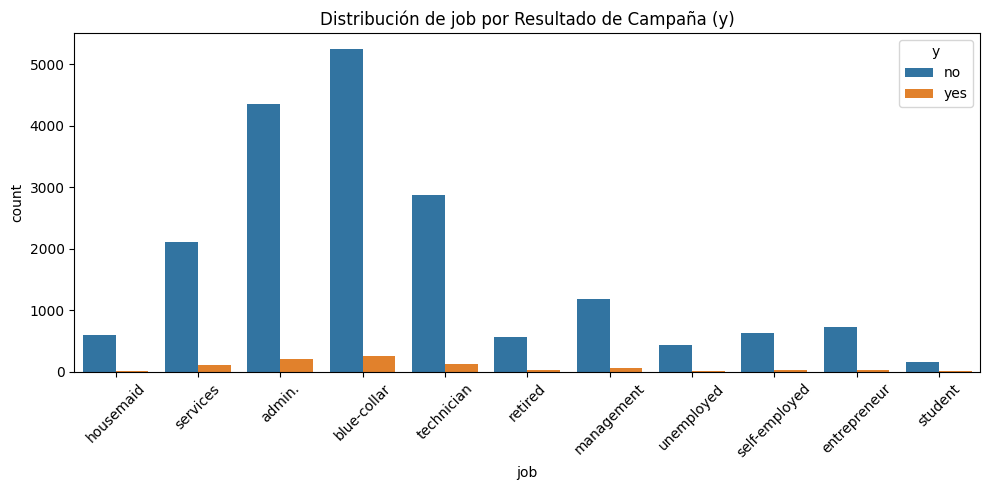

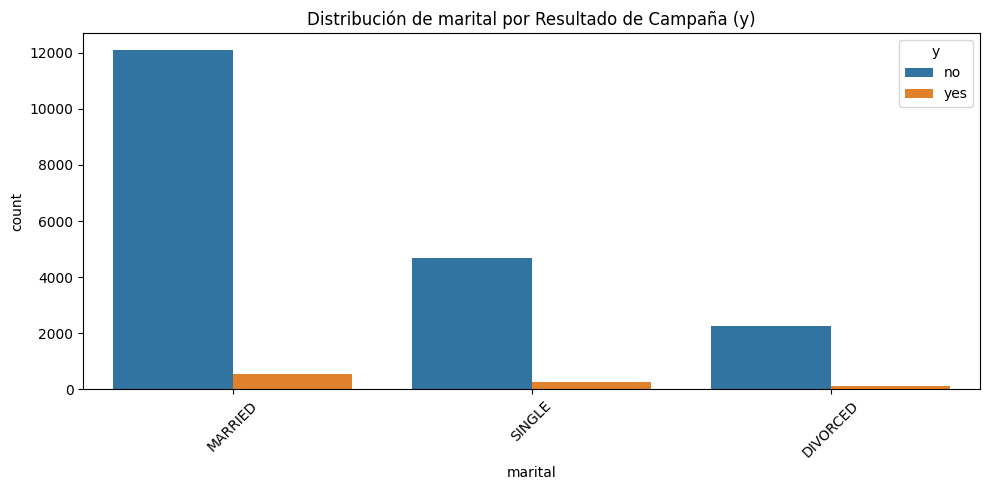

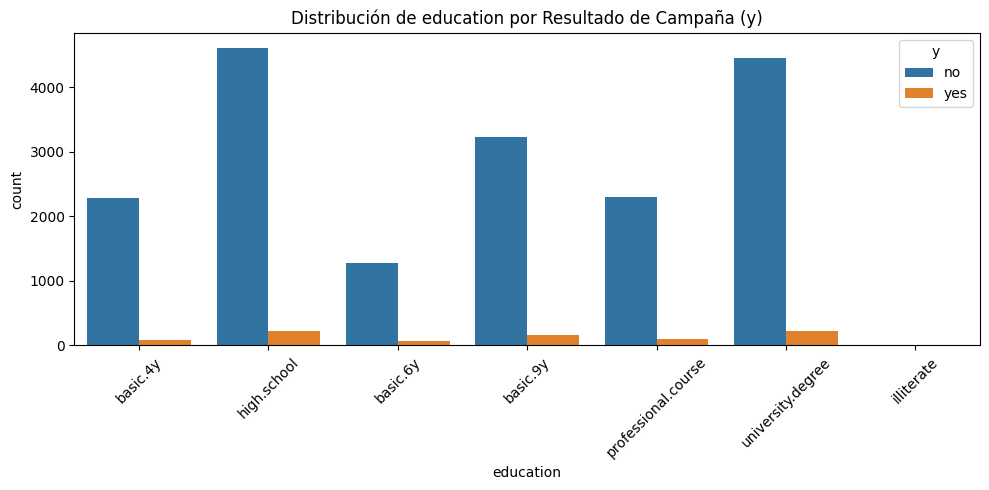

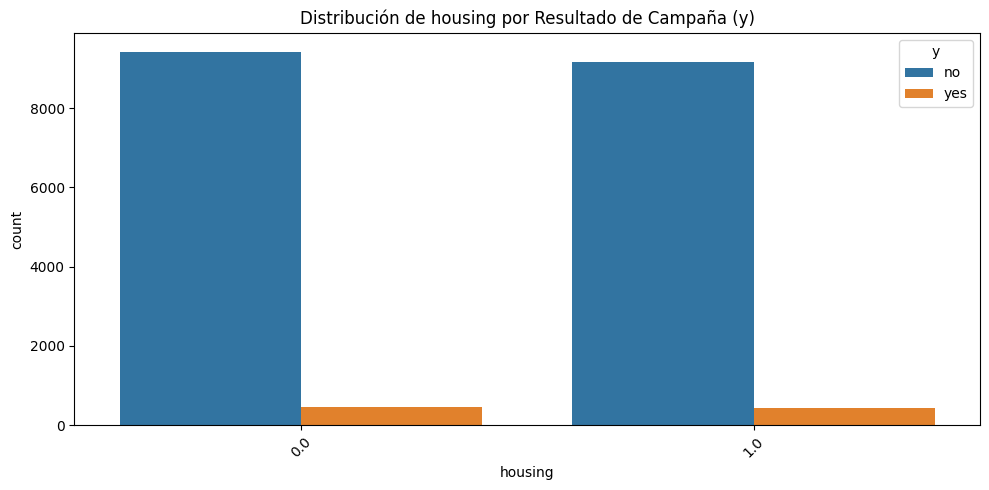

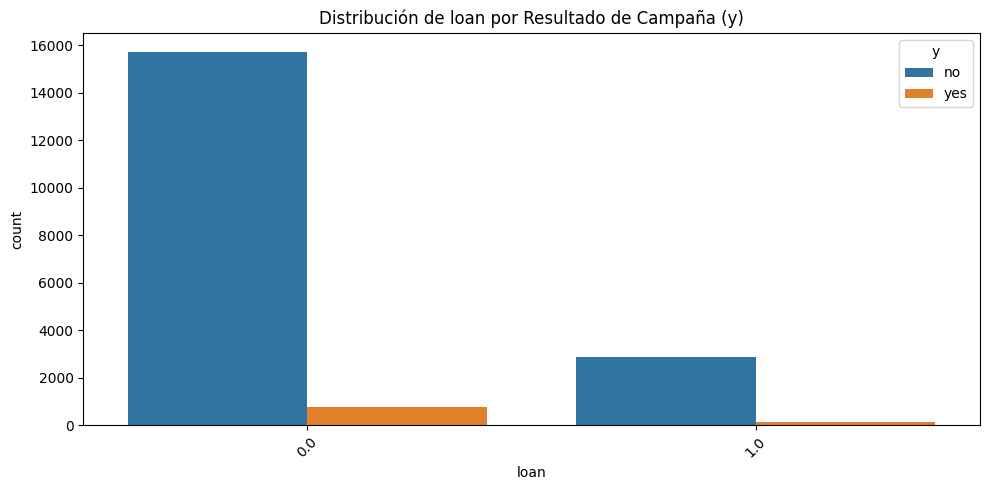

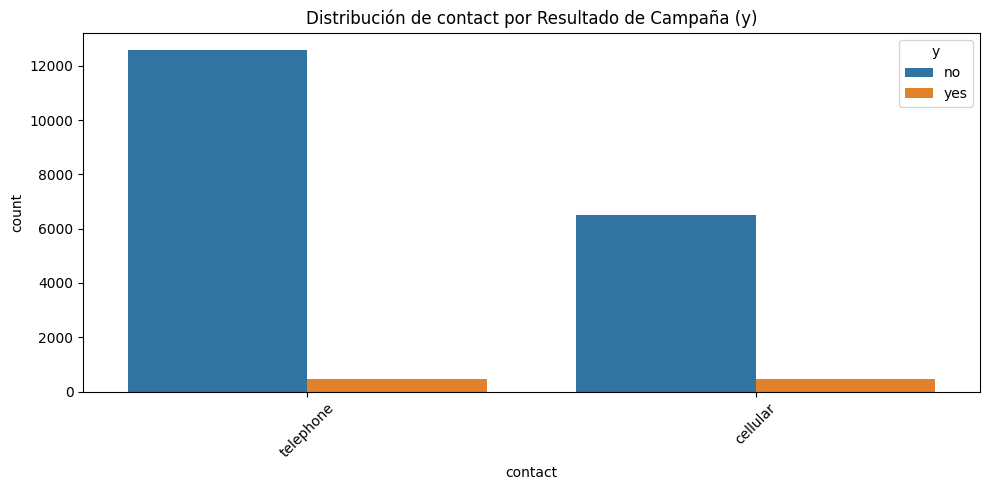

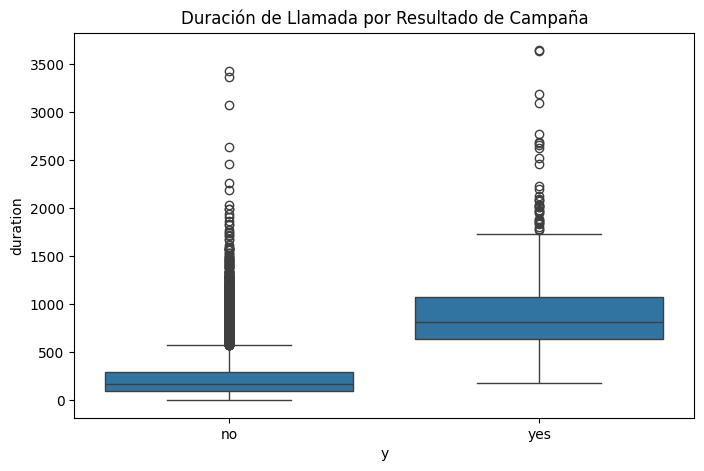

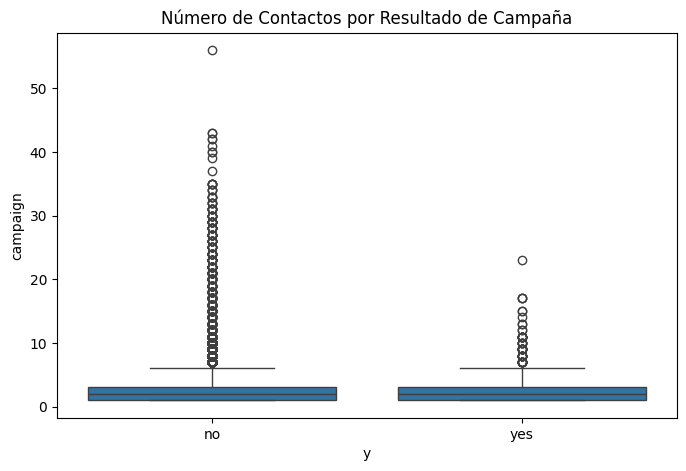


TOP Perfiles de Alta Conversión (job, education, marital):
y                                                 no       yes
job           education           marital                     
admin.        basic.4y            DIVORCED  0.000000  1.000000
student       professional.course DIVORCED  0.000000  1.000000
technician    basic.6y            DIVORCED  0.500000  0.500000
entrepreneur  basic.6y            SINGLE    0.750000  0.250000
services      university.degree   DIVORCED  0.833333  0.166667
retired       basic.9y            DIVORCED  0.833333  0.166667
unemployed    basic.4y            DIVORCED  0.857143  0.142857
student       university.degree   MARRIED   0.857143  0.142857
entrepreneur  high.school         DIVORCED  0.866667  0.133333
self-employed basic.6y            MARRIED   0.875000  0.125000
Archivo exportado: c:\Users\anto-\OneDrive\Desktop\PracticasMaster\insights_conversion_profiles.xlsx
DataFrame limpio exportado a: c:\Users\anto-\OneDrive\Desktop\PracticasMaster\df_ma

In [12]:

# campañas exitosas vs. fallidas (target: 'y'). Sigo usando las librerías de visualización

# Conteo general
print("\nDistribución del Target (y):")
print(df_merged['y'].value_counts(normalize=True) * 100)

# Compararación de variables por segmento y resultado de campaña
categorical_vars = ['job', 'marital', 'education', 'housing', 'loan', 'contact']
for var in categorical_vars:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df_merged, x=var, hue='y')
    plt.title(f"Distribución de {var} por Resultado de Campaña (y)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Análisis de duración de llamada
plt.figure(figsize=(8,5))
sns.boxplot(data=df_merged, x='y', y='duration')
plt.title("Duración de Llamada por Resultado de Campaña")
plt.show()

# Análisis por número de contactos (campaign)
plt.figure(figsize=(8,5))
sns.boxplot(data=df_merged, x='y', y='campaign')
plt.title("Número de Contactos por Resultado de Campaña")
plt.show()

# Detectar perfiles de clientes con alta conversión
# Calculo la tasa de conversión por combinación de variables clave
conversion_profiles = df_merged.groupby(['job', 'education', 'marital'])['y'].value_counts(normalize=True).unstack().fillna(0)
conversion_profiles = conversion_profiles.sort_values(by='yes', ascending=False)

print("\nTOP Perfiles de Alta Conversión (job, education, marital):")
print(conversion_profiles.head(10))

# Exportar insights clave
insights_path = os.path.join(os.getcwd(), "insights_conversion_profiles.xlsx")
conversion_profiles.to_excel(insights_path)
print(f"Archivo exportado: {insights_path}")

# DataFrame final limpio.
df_export_path = os.path.join(os.getcwd(), "df_marketing_limpio.xlsx")
df_merged.to_excel(df_export_path, index=False)
print(f"DataFrame limpio exportado a: {df_export_path}")